<b>Python Essentials for Junior Chemical Engineering
</b><br>
Prerequisite: Install Anaconda with Python 3.8
- Go to https://www.anaconda.com/
- Choose the free individual edition:  https://www.anaconda.com/products/individual
- Choose 64 bit edition ![anacondaInstaller.PNG](attachment:anacondaInstaller.PNG)
 
For help in installing and an overview of Jupyter Notebook you should watch the video shown below, but this is for an early version that is no longer available.  This video and many others on Python are produced by Dr. Hedengren. 
https://youtu.be/LrMOrMb8-3s 

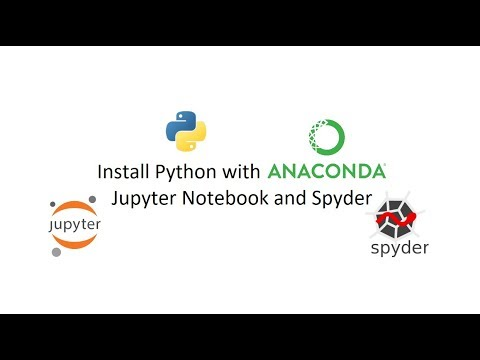

In [1]:
from IPython.display import Audio, Image, YouTubeVideo

YouTubeVideo(id='LrMOrMb8-3s', width=900, height=400)


<br>We will be using jupyter notebooks to submit homework assignments that use python.
List of Python resources https://docs.google.com/document/d/1l9xIOmQDwWPZDqFQ3WAzPcfy12N4prWEVuYT_mH2Ung/edit?usp=sharing
<br><br>
Python is the most popular language used by Chemical Engineer's that write computer programs in industry based on a 2019 Rowan led survey on computing. 

Here are a few important reasons as to why Python is popular:

 - Python is open source (e.g. it is free!)
 - Python has a large collection of libraries.
 - Python is known as the beginner’s level programming language because of it simplicity and easiness.
 - Portability is another reason for huge popularity of Python.
 - Python’s programming syntax is simple to learn and is of high level compared to C, Java, and C++. 
 <br><br>
from:  https://www.edureka.co/blog/python-libraries/

$$\frac{a}{b}$$

We will be using the following libraries.  Install each module through pip or conda (for Anaconda only):
 - Numpy: https://sourceforge.net/projects/numpy/
 - Scipy: https://www.scipy.org/scipylib/download.html
 - Matplotlib: http://matplotlib.org/users/installing.html
<br>You can google any of these to find more information about the individual libraries.
Libraries that we will be using are called in the cell below.  It is good to always have this as the first cell.

In [2]:
import numpy as np #See https://analyticsindiamag.com/the-most-important-numpy-functions-you-should-know-when-learning-python/
from scipy.optimize import fsolve #Non-linear equation solver POLYMATH NLE
from scipy.integrate import solve_ivp #solving system of ODE's (IVP: initial value problem) POLYMATH ODE
import math
import matplotlib.pyplot as plt #plotting package

<b>Lists</b>
which are called Arrays in nearly every other programming language, group various types of data together.  Lists in python are a listing of objects of any type separated by commas and enclosed in square brackets.  We will be using these to store values of position (e.g. $x, y, z, r, \theta$) and values that we calculate ($v, \tau, y_A, c_A, N_A$, etc.)
1.	create_a_list = []
2.	numbers_list = [1, 2, 3]
3.	strings_list = ["spam", "eggs", "cheese"] (Srings are just defined as text and not numbers)
4.	mixed_list = ["Hello", [1, 2, 3], False]
Inserted in the cell below are these 4 lists. <br>

How do you retrive something from these lists?
Type the list name and then its index.  Index's in most computer languages start counting from zero.  This may seem odd, but it is all about efficency.  Think of it as how far down the list you need to move your cursor.  If you want the first element you don't need to move at all!

In [3]:
create_a_list = []
numbers_list = [1, 2, 3]
strings_list = ["spam", "eggs", "cheese"]
mixed_list = ["Hello", [1, 2, 3], False]
#The first element
print(numbers_list[0])
print(strings_list[1])
print(mixed_list[2])

1
eggs
False


In [4]:
#The second element
print(numbers_list[1])
print(strings_list[1])
print(mixed_list[1])

2
eggs
[1, 2, 3]


In [5]:
#The last element we can either use 2 or if we don't know the total number of elements use -1
print(numbers_list[-1])
print(numbers_list[2])
print(strings_list[-1])
print(mixed_list[-1])

3
3
cheese
False


<b>Block Programming:  functions and for, if and while loops </b> <br>
One idiom that trips up many new Python users is indentation. Python uses indentation (4 spaces) to logically organize code into sections called [code blocks](http://en.wikipedia.org/wiki/Block_(programming). A code block starts with an indent and ends with a dedent (un-indent?). Incorrect indentation will generate an error in Python preventing your code from executing. 

We will start with functions that contain the set of equations and unkowns or set of differential equations and unknowns.  This function needs to be passed to a solver.  $$-{\Delta P}_P -\rho g z_4= 0$$ with the pressure drop across the pump 
$$\Delta P_P = \left(-72 psig +\frac{0.0042 psig F1^2Q^2}{GPM^2}\right)\frac{1.01325\times 10^5Pa}{14.696psig}$$
and $$F1 = 1gal/3.785 L*1000 m^3/L*60 s/min$$
The flowrate, $Q$ is in $m^3/s$ and $z_4=80ft$
The function flow takes a value of Q and calculates the difference between the $-\Delta P_P$ and $\rho g z_4$  The function fsolve goes through several iterations to find the zero of this difference.

In [6]:
#This is a function.  You need to create functions that contain the equations you want to solve.  
#In this cell is a function called flow that calculates the zero of a function
def flow(Q):
    F1 = 1/3.785*1000*60
    deltaPUMP = (-72+0.0042*F1**2*Q**2)*1.01325e5/14.696
    fx=1000*9.81*80*0.3048-deltaPUMP
    return fx
Qguess=[0.1]
Q=fsolve(flow,Qguess,xtol=1e-9)
print(Q)

[0.0100545]


In [7]:
fx=flow(0.0100545)
print(fx)
print('{:.16f}'.format(Q[0]))

-0.5009452954982407
0.0100544965765625


fx=0.5 doesn't seem like a good zero, but if we use more digits in the value of Q we getter a smaller zero

In [8]:
fx=flow(0.0100544965765625)
print(fx)
print('{:.16f}'.format(Q[0]))
# or use all the digits in the value Q[0]
fx=flow(Q[0])
print(fx)
print('{:.16f}'.format(Q[0]))

-7.0140231400728226e-09
0.0100544965765625
5.820766091346741e-11
0.0100544965765625


Here we add a print statement to look at the values of deltaPUMP and $\rho g z_4$.  The difference should be zero.  Here we see that 0.5 is quite small compared to 239207.04 

In [9]:
#This is a function.  You need to create functions that contain the equations you want to solve.  
#In this cell is a function called flow that calculates the zero of a function
def flow(Q):
    F1 = 1/3.785*1000*60
    deltaPUMP = (-72+0.0042*F1**2*Q**2)*1.01325e5/14.696
    print('{}   {}  '.format(deltaPUMP,1000*9.81*80*0.3048))
    fx=1000*9.81*80*0.3048-deltaPUMP
    return fx
Qguess=[0.1]
Q=fsolve(flow,Qguess)
print(Q)
print(type(Q))
print('{:.12f}'.format(Q[0]))

[72271085.58081229]   239207.04  
[72271085.58081229]   239207.04  
[72271085.58081229]   239207.04  
[72271087.74945298]   239207.04  
[18065128.947435]   239207.04  
[8029157.76625007]   239207.04  
[2897053.37541396]   239207.04  
[1152239.4523777]   239207.04  
[487519.88180244]   239207.04  
[282975.77062891]   239207.04  
[242299.22954114]   239207.04  
[239251.62337122]   239207.04  
[239207.08675159]   239207.04  
[239207.04000071]   239207.04  
[239207.04]   239207.04  
[0.0100545]
<class 'numpy.ndarray'>
0.010054496577


Below is a <b>for</b> loop that starts at i=0 and adds 1 to i and stops before i=7.  Only the <b>indented</b> lines are in the for loop (lines 7 and 8).  I line 8 I use a new format statement.  See for formatting https://www.python-course.eu/python3_formatted_output.php

In [10]:
# this is a for loop that will execute 7 times
flowrates=['q01','q12','q13','q24','q23','q34','q45']#defines an array of text
x= [ 1.,   2.5,  4.,   5.5,  7.,   8.5, 10. ]# This is an array of 7 numbers that start at 1 and end at 10
fv=np.zeros(7) #This initializes an array that you will fill with numbers in line 7
print('i  stream     x      fv')#this prints a header line
for i in range (7): #The for loop.  Starts i=0 and stops before it gets to 7.
    fv[i]=1+x[i]/60.
    print('{}   {}    {:5.2f}    {:6.4f}' .format(i,flowrates[i],x[i],fv[i]))#
    

i  stream     x      fv
0   q01     1.00    1.0167
1   q12     2.50    1.0417
2   q13     4.00    1.0667
3   q24     5.50    1.0917
4   q23     7.00    1.1167
5   q34     8.50    1.1417
6   q45    10.00    1.1667


The following is an example of an if statement that prevents a divide by zero.  This is used in pipe flow problems in which one derivative has $\tau_{rx}r$ and you need $\tau_{rx}$ $$\frac{\partial (\tau_{rx}r)}{\partial r}= \left(-\frac{\partial P}{\partial x}\right)r$$  For this pipe the integration starts at $r=0$ and ends at $r=0.2$


In [2]:
#This if statement that prevents a divide by zero
r=[0., 0.03333333, 0.06666667, 0.1, 0.13333333, 0.16666667, 0.2]
rTAUrx=[0,0.000166667,0.000666667,0.0015,0.002666667,0.004166667,0.00600] 
TAUrx=np.zeros(len(rTAUrx))
print('i    r      TAUrx') 
for i in range(7):
    if r[i] > 0:
        TAUrx[i] = rTAUrx[i] / r[i]
    else:
        TAUrx[i] = 0
    print('{:d}   {:.4f}  {:.4f}' .format(i,r[i],TAUrx[i]))


i    r      TAUrx
0   0.0000  0.0000
1   0.0333  0.0050
2   0.0667  0.0100
3   0.1000  0.0150
4   0.1333  0.0200
5   0.1667  0.0250
6   0.2000  0.0300


<b>Numpy Functions:  np.arange</b>
<br>np.arange([start,] stop[, step], [, dtype=None])<br>
arange returns evenly spaced values within a given interval. The values are generated within the half-open interval [start, stop) 
 - If the function is used with integers, it is nearly equivalent to the Python built-in function range, but arange returns an ndarray rather than a list iterator as range does. 
 - If the 'start' parameter is not given, it will be set to 0. 
 - The end of the interval is determined by the parameter 'stop'. Usually, the interval will not include this value, except in some cases where 'step' is not an integer and floating point round-off affects the length of output ndarray. 
 - The spacing between two adjacent values of the output array is set with the optional parameter 'step'. The default value for 'step' is 1. If the parameter 'step' is given, the 'start' parameter cannot be optional, i.e. it has to be given as well. 
 - The type of the output array can be specified with the parameter 'dtype'. If it is not given, the type will be automatically inferred from the other input arguments.

In [ ]:
#np.arange(Start, stop before this value, step)
a = np.arange(1, 10,0.1)
print(a)

<b>Numpy: np.linspace</b>

np.linspace(start, stop, num=50, endpoint=True, retstep=False)

linspace returns an ndarray, consisting of 'num' equally spaced samples in the closed interval [start, stop] or the half-open interval [start, stop). If a closed or a half-open interval will be returned, depends on whether 'endpoint' is True or False. 
 - The parameter 'start' defines the start value of the sequence which will be created. 
 - 'stop' will the end value of the sequence, unless 'endpoint' is set to False. In the latter case, the resulting sequence will consist of all but the last of 'num + 1' evenly spaced samples. This means that 'stop' is excluded. Note that the step size changes when 'endpoint' is False. 
 - The number of samples to be generated can be set with 'num', which defaults to 50. 
 - If the optional parameter 'endpoint' is set to True (the default), 'stop' will be the last sample of the sequence. Otherwise, it is not included.

In [ ]:
#linspace(start, stop, num=50, endpoint=True, retstep=False)
# 50 values between 1 and 10:
print(np.linspace(1, 10))
# 7 values between 1 and 10:
print(np.linspace(1, 10, 7))
# excluding the endpoint:
print(np.linspace(1, 10, 7, endpoint=False))

<b>Numpy:  np.zeros</b><br>When forming an array in a for loop you will need to initialize it first.  if you know the length then use that value.  Otherwise you may have to base it off of another array and then use the len(arrray) command to find the length

In [ ]:
x=np.zeros(7)
print(x)
y=np.linspace(1,10,7)
print (y)
print (len(y))
z=np.zeros(len(y))#This is the same as np.zeros(7) but it can be used to match the length of y
print (z)

<b>Matlibplot:  Simple plots.</b>
Using the values of the arrays TAUrx and r given above and the new array v given below 2 plots are made of the velocity and stress profile.  The plt.subplot command creates 2 plots on top of each other.  The plt.subplot(numrows, numcols, plot_number).  So in the example below you have 2 rows, 1 column, and 2 plots.  See the tutorial for more information https://matplotlib.org/tutorials/introductory/pyplot.html

In [ ]:
#This is an example of a basic plot 
v=[3,2.916666683,2.666666633,2.25,1.666666733,0.916666583,0]
r=[0., 0.03333333, 0.06666667, 0.1, 0.13333333, 0.16666667, 0.2]
plt.plot(r,v)
plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')

In [ ]:
#plot two plots of data

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)#numrows, numcols, plot_number 
plt.plot(r,v,'b',label='Vx',dashes=[8, 2])#The 'b' prints a blue line, the dashes 8 on, 2 off

plt.title(' Velocity Profile')
plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.subplot (2,1,2)#numrows, numcols, plot_number
plt.plot(r,TAUrx,'r',label='Tau',dashes=[6, 3])#The 'r' prints a blue line, the dashes 6 on, 3 off

plt.title(' Stress Profile')
plt.xlabel('Radius (m)')
plt.ylabel('Stress (Pa)')
plt.legend()

This is a combined plot using the same x-axis of the pipe radius, but velocity is on the first y-axis and stress is on the second y-axis.  This uses the recommended figure and axis plots which are given here https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
Below is the overall key to using the object oriented
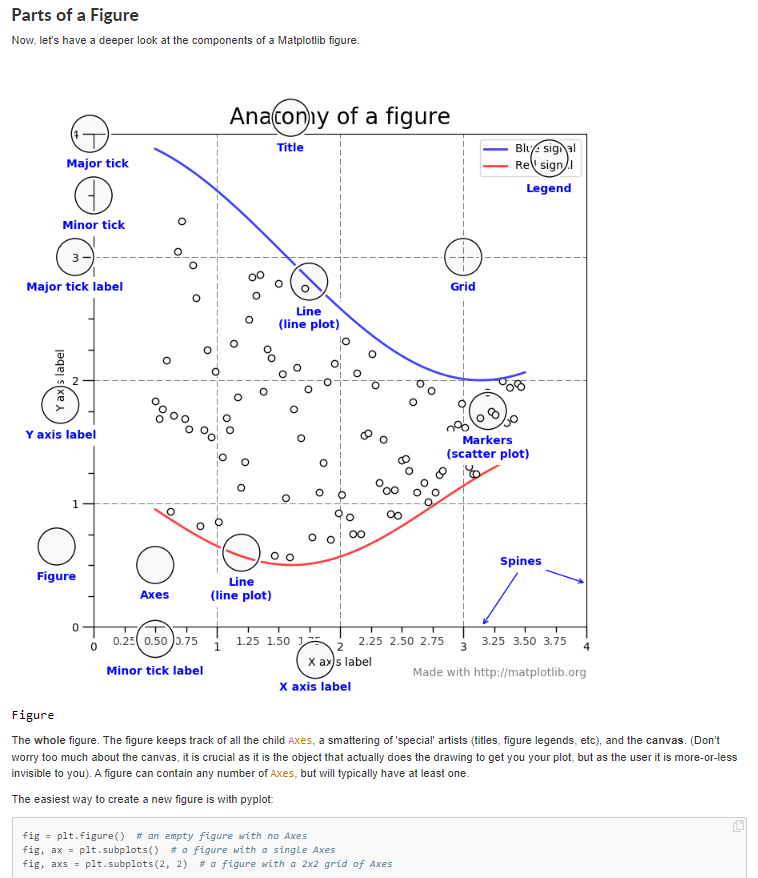
The key difference in using this (preferred) method is that an axes (yes with an e) is what you would consider a plot.  So in the example below we have combined 2 plots with the same x-axis.

In [ ]:
v=[3,2.916666683,2.666666633,2.25,1.666666733,0.916666583,0]
#plot one plot of data with 2 y-axes

fig, ax1 = plt.subplots(figsize=(8,6))

color = 'tab:red'
ax1.set_xlabel('Radius (m)')
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.plot(r, v, color=color,label='Velocity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim([0, 0.2])#This sets the x limits.  comment this out first to see the default
ax1.set_ylim([0, 3.0])#This sets the y limits.  comment this out first to see the default

plt.legend(bbox_to_anchor=(1.2, 1.), loc='upper left')
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stress (Pa)', color=color)  # we already handled the x-label with ax1
ax2.plot(r, TAUrx, color=color,label='Tau')
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylim([0, 0.03])#This sets the y limits.  comment this out first to see the default
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(bbox_to_anchor=(1.2, 0.95),loc='upper left')

